In [74]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

car_seats = pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\Random Forests\\Company_Data.csv",header=0)

sales_category=[]

for value in car_seats['Sales']:
    if (value >= 7.5) :
        sales_category.append('Greater than or Equal to 7.5')
    else:
        sales_category.append('Lesser than 7.5')

modified_car_seats=car_seats.drop(['Sales'],axis=1)
modified_car_seats['Sales']=pd.Series(sales_category)

encoder=preprocessing.LabelEncoder()
modified_car_seats['ShelveLoc']=encoder.fit_transform(modified_car_seats['ShelveLoc'])
modified_car_seats['Education']=encoder.fit_transform(modified_car_seats['Education'])
modified_car_seats['Urban']=encoder.fit_transform(modified_car_seats['Urban'])
modified_car_seats['US']=encoder.fit_transform(modified_car_seats['US'])

features=modified_car_seats.columns[0:10]
output=modified_car_seats.columns[10]
modified_car_seats

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,0,42,7,1,1,Greater than or Equal to 7.5
1,111,48,16,260,83,1,65,0,1,1,Greater than or Equal to 7.5
2,113,35,10,269,80,2,59,2,1,1,Greater than or Equal to 7.5
3,117,100,4,466,97,2,55,4,1,1,Lesser than 7.5
4,141,64,3,340,128,0,38,3,1,0,Lesser than 7.5
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,4,1,1,Greater than or Equal to 7.5
396,139,23,3,37,120,2,55,1,0,1,Lesser than 7.5
397,162,26,12,368,159,2,40,8,1,1,Lesser than 7.5
398,100,79,7,284,95,0,50,2,1,1,Lesser than 7.5


In [75]:
#Random Forest Model Building and Predictions on the Entire Dataset as OOB_Score set to True which
#accounts for predicting missed 1/3th of the data samples in the Bootstrap sample for every Tree which is 
#Similar to making each Tree to predict for unseen samples apart from its respective Bootstrap Sample 
#OOB_Score tells the performance of the Classifier
model_rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=61,criterion="gini",bootstrap=True,
                                  max_depth=13, min_samples_split=4,random_state=8)

model_rf.fit(modified_car_seats[features],modified_car_seats[output])
modified_car_seats['Predictions'] = model_rf.predict(modified_car_seats[features])
print("RandomForest Classifier performance based on OOB_Score is: ",model_rf.oob_score_)

print(pd.crosstab(modified_car_seats['Sales'],modified_car_seats['Predictions']))

RandomForest Classifier performance based on OOB_Score is:  0.8
Predictions                   Greater than or Equal to 7.5  Lesser than 7.5
Sales                                                                      
Greater than or Equal to 7.5                           199                0
Lesser than 7.5                                          1              200


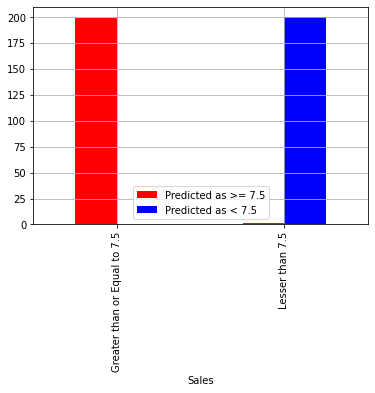

In [76]:
#Plot to analyse variation between the Predicted values and the Actual Values on the Dataset
pd.crosstab(modified_car_seats['Sales'],modified_car_seats['Predictions']).plot(kind='bar',color=['red','blue'], grid=True)
plt.legend(['Predicted as >= 7.5','Predicted as < 7.5'])
plt.show()

In [77]:
# RF Model Accuracy
print("Model Accuracy achieved by RFC Algorithm(%): ",np.mean(modified_car_seats.Sales == modified_car_seats.Predictions)*100)

Model Accuracy achieved by RFC Algorithm(%):  99.75
